In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']
freq_filters = []
for item in filters:
    f = np.fft.fft2(item)
    fshift = np.fft.fftshift(f)
    ffreq = 20 * np.log(np.abs(fshift)+1)
    freq_filters.append(ffreq)

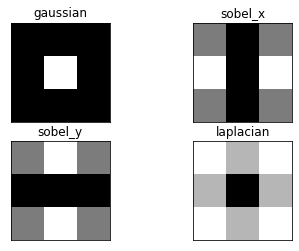

In [2]:
# display each filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1)
    plt.imshow(freq_filters[i], cmap='gray')
    plt.title(filter_name[i])
    plt.xticks([]), plt.yticks([])

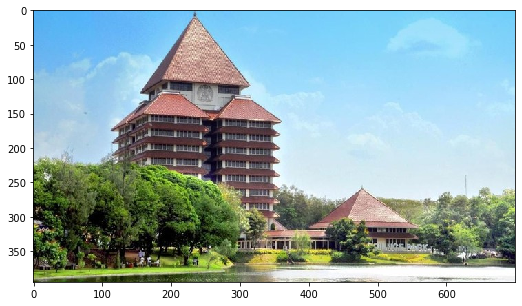

In [25]:
# read the image
img = cv2.imread('images/ui.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,5))
plt.imshow(img)

In [8]:
# perform each filters to the image

cache = [cv2.filter2D(gray,-1,item) for item in filters]

img_filters = []
for item in cache:
    fft = np.fft.fft2(item)
    fshift = np.fft.fftshift(fft)
    freqh = 20 * np.log(np.abs(fshift))
    img_filters.append(freqh)
    

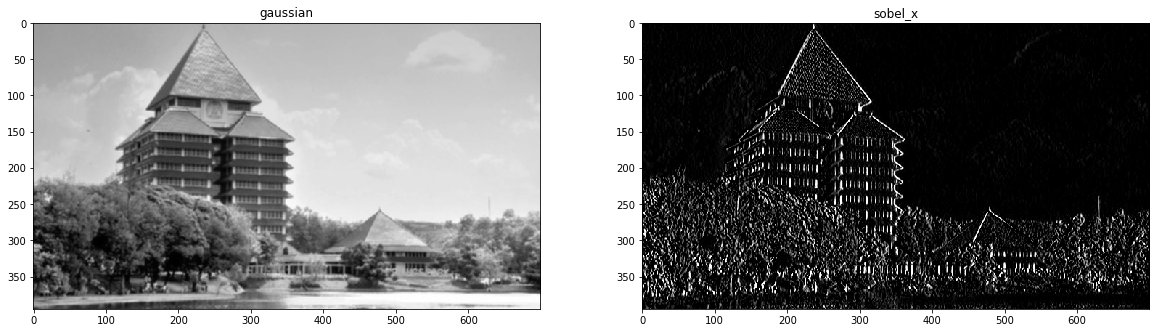

In [23]:
# display image
f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.set_title(filter_name[0])
ax1.imshow(cache[0], cmap='gray')

ax2.set_title(filter_name[1])
ax2.imshow(cache[1], cmap='gray')

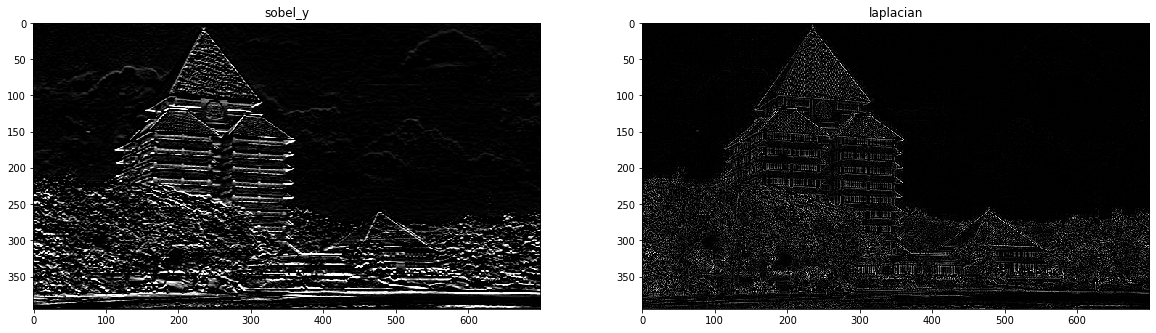

In [24]:
f, (ax3,ax4) = plt.subplots(1,2, figsize=(20,10))

ax3.set_title(filter_name[2])
ax3.imshow(cache[2], cmap='gray')

ax4.set_title(filter_name[3])
ax4.imshow(cache[3], cmap='gray')